In [109]:
#all imports
import xml.etree.ElementTree as et
import requests
import csv
import io
import PIL
import matplotlib.pyplot as plt

In [97]:
url='https://www.nasa.gov/rss/dyn/breaking_news.rss'

In [98]:
response= requests.get(url)

In [99]:
with open('topnewsfeed.xml','wb') as f:
    f.write(response.content)

In [100]:
tree=et.parse('topnewsfeed.xml')

In [101]:
root=tree.getroot()

In [102]:
newsitem=[]
for item in root.findall('./channel/item'):
    news={}
    for child in item:
            if child.tag=='enclosure':
                news['image']=child.attrib['url']
            news[child.tag]=child.text
    newsitem.append(news)        
        

News Title: NASA to Make Announcement About WFIRST Space Telescope Mission
News Date: Mon, 18 May 2020 12:37 EDT


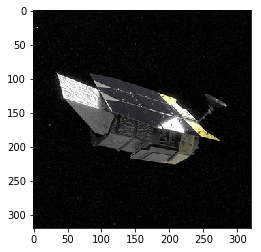

News Title: NASA TV to Air Launch, Capture of Cargo Ship to International Space Station
News Date: Wed, 13 May 2020 13:42 EDT


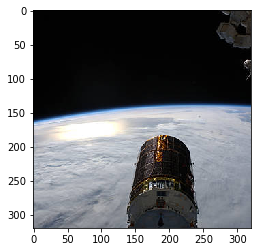

News Title: NASA Funds Artemis Student Challenges to Inspire Space Exploration
News Date: Thu, 07 May 2020 15:48 EDT


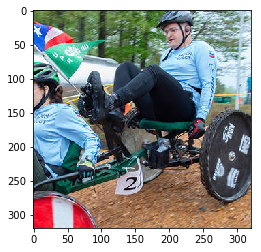

News Title: NASA TV to Air Northrop Grumman’s Cygnus Departure from Space Station
News Date: Wed, 06 May 2020 11:40 EDT


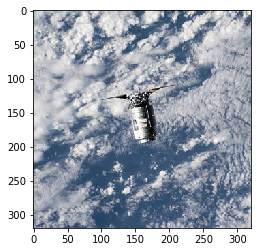

News Title: NASA Builds on Investments in US Small Business’ Beneficial Technologies
News Date: Tue, 05 May 2020 14:43 EDT


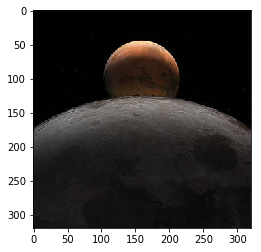

News Title: NASA to Provide Coverage of SpaceX Commercial Crew Test Flight with Astronauts
News Date: Fri, 01 May 2020 16:07 EDT


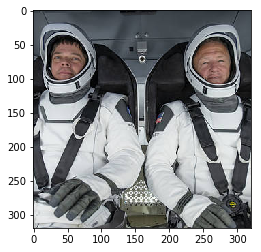

News Title: NASA Commits to Future Artemis Missions with More SLS Rocket Engines
News Date: Fri, 01 May 2020 14:42 EDT


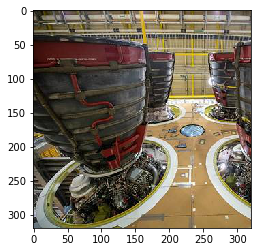

News Title: Educators to Speak with NASA Astronaut Aboard Space Station
News Date: Fri, 01 May 2020 12:59 EDT


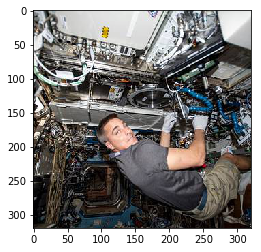

News Title: NASA-Developed Ventilator Authorized by FDA for Emergency Use
News Date: Thu, 30 Apr 2020 15:13 EDT


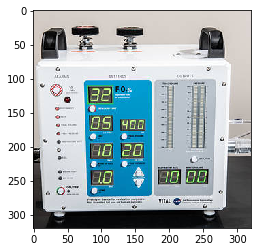

News Title: NASA Names Companies to Develop Human Landers for Artemis Moon Missions
News Date: Thu, 30 Apr 2020 11:29 EDT


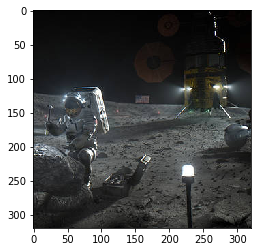

In [103]:
for item in newsitem:
    print('News Title:',item['title'])
    print('News Date:',item['pubDate'])
    imageResponse=requests.get(item['image'])
    imageByte=io.BytesIO(imageResponse.content)
    imag=Image.open(imageByte)
    plt.imshow(imag)
    plt.show()

